In [ ]:
!pip install -U keras
!pip install -U tensorflow

In [2]:
!pip install np_utils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 1.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for np_utils: filename=np_utils-0.6.0-py3-none-any.whl size=56441 sha256=b38ef866946a5bf2f466277e16865255956c3b517cabe42f702ad2bdcef87d23
  Stored in directory: /root/.cache/pip/wheels/b6/c7/50/2307607f44366dd021209f660045f8d51cb976514d30be7cc7
Successfully built np_utils


In [3]:
import nltk
import pandas as pd
import re
import numpy as np
import math
import sklearn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

# Data processing

In [ ]:
data = 'https://raw.githubusercontent.com/Tong00020/NLP---2024/main/output.csv'

In [5]:
df_train = pd.read_csv(data, names=["review_text","polarity"])
df_train

<ipython-input-5-26c55ce26321>:1: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_train = pd.read_csv(data, names=["review_text","polarity"])


,review_text,polarity
NaN,review_text,polarity
0.0,curtindo,1.0
1.0,aplicativo absurdamente caro valor tornar prêm...,0.0
2.0,simples novo layout,1.0
3.0,estava problema acessar porém consegui resolve...,1.0
...,...,...
1039530.0,legal,1.0
1039531.0,assim ficar dentro situação bolsa família gostei,1.0
1039532.0,NaN,0.0
1039533.0,excelente aplicativo treinar conhecimentos ing...,1.0


In [6]:
df_train.dropna(inplace = True)

In [7]:
print(f"Training has {df_train.shape} reviews")

Training has (901015, 2) reviews


In [8]:
corpus = df_train['review_text']

In [10]:
df_train["polarity_label"] = df_train["polarity"].map({0.0: 'negative', 1.0: 'positive'})

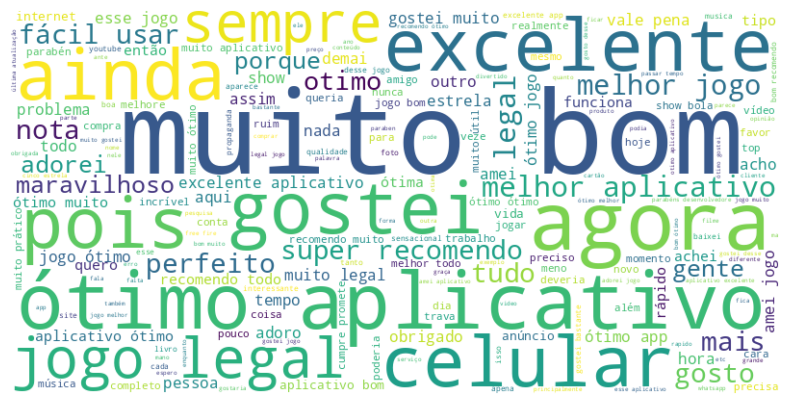

In [22]:
from wordcloud import WordCloud

def generate_word_cloud_from_dict(df: pd.DataFrame, review: str):
    words = ' '.join([ word for word in df[review] ])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(words)

    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()


generate_word_cloud_from_dict(df_train.query("polarity_label == 'positive'"), "review_text")

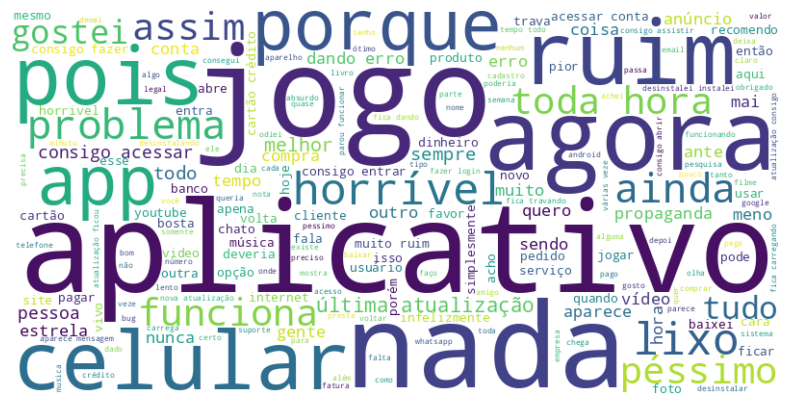

In [26]:
generate_word_cloud_from_dict(df_train.query("polarity_label == 'negative'"), "review_text")